# AWS QuickSight 대시보드 만들기

## 참고 사이트 및 유투브(계속 추가해 나갈것)

### 참고 사이트
* AWS 공식문서: https://docs.aws.amazon.com/
* AWS S3구축, 마이그레이션, Glue, Athena, QuickSight: https://velog.io/@juhyeon1114/AWS-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D-%ED%99%98%EA%B2%BD-%EA%B5%AC%EC%B6%95%ED%95%98%EA%B8%B0
* AWS S3구축: https://velog.io/@jinseoit/AWS-S3-bucket
* AWS S3구축 및 권한설정: https://velog.io/@kyu0/AWS-S3-%EB%8F%84%EC%9E%85-feat.-Javascript-v3-%EB%A7%88%EC%9D%B4%EA%B7%B8%EB%A0%88%EC%9D%B4%EC%85%98
* AWS 데이터분석: https://choiblog.tistory.com/195
* AWS Lambda 아키텍처: https://velog.io/@hkjs96/AWS-Lambda
* AWS Glue: https://velog.io/@ginee_park/AWS-Glue%EB%9E%80
* 뱅크샐러드 DMS구축: https://blog.banksalad.com/tech/dms/
* QuickSight로 데이터 시각화: https://devocean.sk.com/blog/techBoardDetail.do?ID=166010&boardType=techB
* Presigned URL을 이용하여 S3dp 파일 업로드: https://velog.io/@mimi0905/Presigned-URL%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%98%EC%97%AC-S3%EB%A1%9C-%ED%8C%8C%EC%9D%BC-%EC%97%85%EB%A1%9C%EB%93%9C
### 유투브
* https://www.youtube.com/watch?v=VDqToPfbuok&t=275s
* https://www.youtube.com/watch?v=CQ6WNfk41nM&t=447s
* https://www.youtube.com/watch?v=r55FmaUCChU
* https://www.youtube.com/watch?v=7V28RjcQY5s&t=1926s
* https://www.youtube.com/watch?v=9pEhI2kwq7Y
* https://www.youtube.com/watch?v=f9LZWCSgojE
* https://www.youtube.com/watch?v=MZGloAruLGQ&t=131s
* https://www.youtube.com/watch?v=H7W_AI5heSo&t=150s
* https://www.youtube.com/playlist?list=PLTgRMOcmRb3OTZ-cnP43ucMnXUyO7P9az

## AWS S3(Simple, Storage, Service)

* 공식문서: https://docs.aws.amazon.com/ko_kr/AmazonS3/latest/userguide/Welcome.html
* 데이터레이크의 기능 수행, 버킷이라는 단위의 디렉토리 생성, 데이터 적재, 유연성과 확장성이 좋아 AWS 내 다른 서비스와 연계 가능
* [대용량 데이터]: aws공식문서에 따르면 Amazon S3 콘솔을 사용하는 경우, 업로드할 수 있는 최대 파일 크기는 160GB임. 160GB보다 큰 파일을 업로드하려면, AWS CLI, AWS SDK 또는 Amazon S3 REST API를 사용해야 함
* 단순히 크롤러로 S3의 데이터를 스캔하여 Athena 연결을 위한 도구로 사용해도 되지만, 버킷을 input, output형태로 생성하면 Glue에서 input에 업로드된 raw데이터를 Glue에서 형식변환이나 어떠한 변환과정을 거쳐 다시 S3 output버킷에 저장 할 수 있는 형태로 활용하는 방식도 가능하다는 것을 파악
* 마찬가지로 script에 대한 버킷을 생성하여 변환 시 고급설정-script path를 스크립트 주소로 지정할 수 있음, (GPT에 따르면)사용자 정의 스크립트를 사용하여 데이터를 변환을 가능하게 하는 것으로 추정. 이 경로에는 사용자가 작성한 PySpark 또는 Scala 스크립트가 위치하며, AWS Glue는 이를 실행하여 데이터를 처리합니다. 이를 통해 기본 제공 기능을 넘어 사용자 고유의 로직을 구현

### 대용량 데이터의 경우

* 관련문서: https://docs.aws.amazon.com/ko_kr/AmazonS3/latest/userguide/mpuoverview.html

* AWS에선 업로드 할 객체(데이터파일)가 100M에 근접할 경우, 단일 작업에서 객체를 업로드하는 대신 멀티파트 업로드 사용을 권장함

## AWS Athena

* S3에 저장된 데이터를 기반으로 동작하는 서버리스 분산형 SQL엔진, 서버리스 인터랙티브 쿼리 서비스, Amazon S3에 저장된 데이터를 표준 SQL을 사용하여 쿼리할 수 있음
* S3에 저장된 데이터들을 ANSI SQL형식의 SQL로 조회
* 쉽게 말해, 사용자는 데이터를 불러오거나 인프라를 설정할 필요 없이 바로 쿼리할 수 있음

### 특징
* 서버리스: 인프라를 관리할 필요가 없으며, 사용한 쿼리 런타임에 대해서만 비용이 지불됨
* 표준 SQL 지원: SQL을 사용하여 데이터를 쿼리하고 분석
* 빠른 데이터 분석: S3에 저장된 데이터에 대해 빠르게 쿼리를 실행할 수 있어, 데이터 웨어하우스 없이도 가능
* 통합: 다양한 데이터 형식(JSON, CSV, Parquet 등)을 지원하며, Amazon QuickSight와 같은 시각화 도구와 용이

### 쿼리 편집기

* 아래 안내 문자를 보면, 최초 쿼리 실행 시에 결과를 반환할 S3버킷을 설정해줘야 한다.

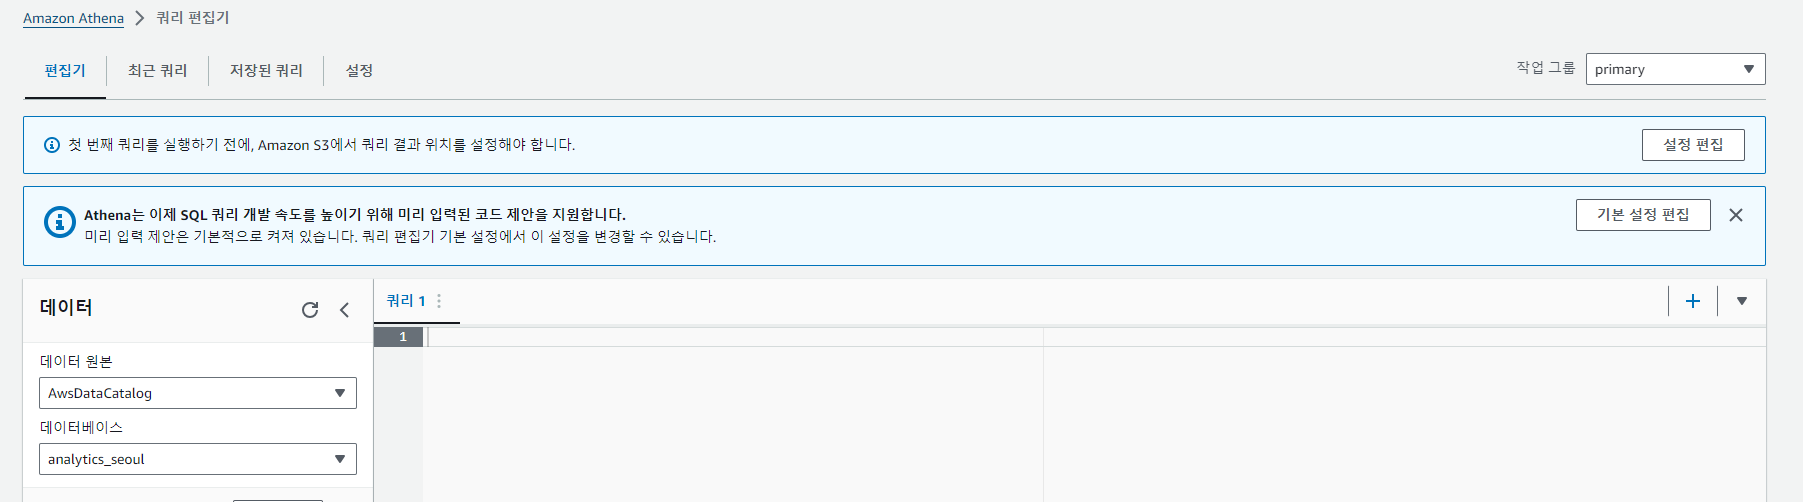

* 설정-관리에 들어가서 s3버킷을 설정해주면 되나, 현재 안내받은 사항이 없어 설정을 하진 않는다.

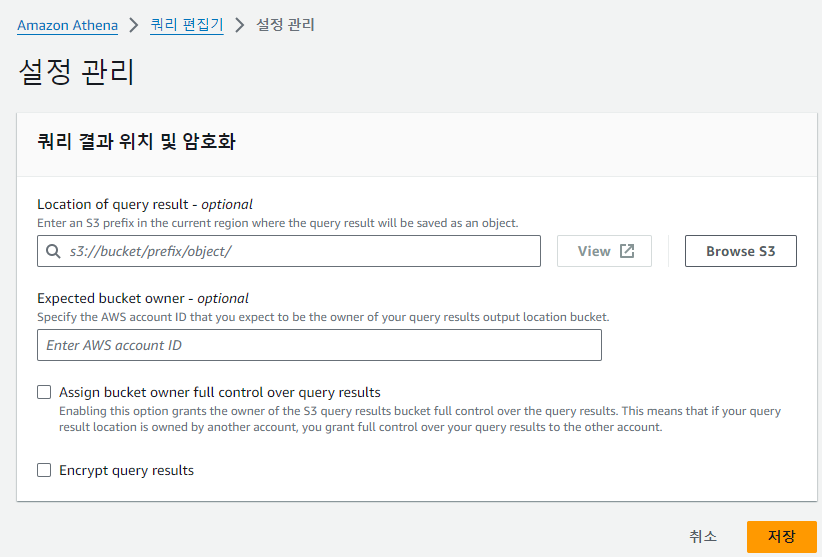

* 버킷설정이 완료 되었다면 쿼리 편집기에서 쿼리문을 작성하여 테이블을 조회하거나, 아래와 같이 테이블 미리 보기를 클릭하는 등의 GUI를 활용하여 테이블을 조회할 수 있다.

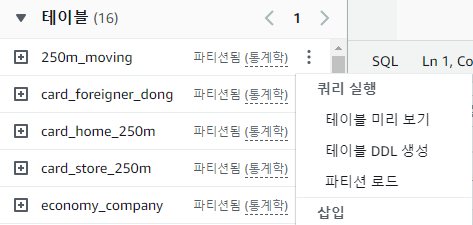

## AWS QuickSight

* AWS에서 제공하는 serverless managed BI툴* 
QuickSight를 사용하여 특정 데이터에 대한 시각화 대시보드를 생성하고 다른 사용자와 공유할 수 있다.

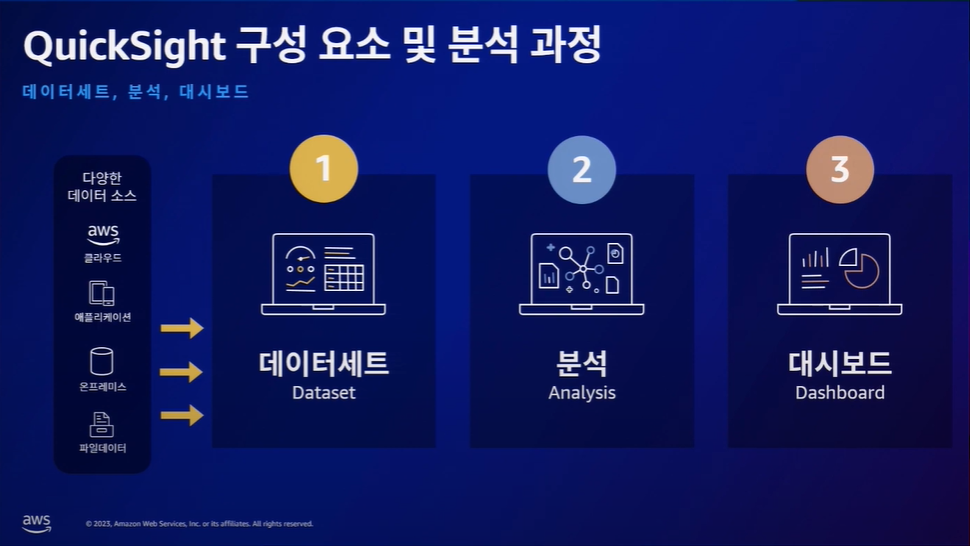

### 접근 권한 부여
* S3 접근 권한 추가 하기: QuickSight에서 Athena를 사용하려면, Athena에 연동된 S3에 접근할 수 있도록 권한 설정을 해줘야한다.
* Athena - Security & Permissions - manage - Amazon Athena 클릭하고 권한 관련 팝업 Next, 연동된 S3, Athena 체크하고 마치면 됨

### 데이터셋 불러오기
* 새로운 데이터셋을 불러올때 duplicates dataset옵션 사용
* 복제된 데이터셋은 QuickSight상에서만 유효함
* 원본데이터셋과 동일한 데이터소스를 가짐
* 복제된 데이터를 이용하여 분석할때 계산필드를 추가한다거나 하는 변경사항이 생기더라도 원본 데이터에 영향X, 보다 안전한 방법일 것으로 생각됨
* 실제 데이터가 복제되는 것이 아니므로 추가적인 스토리지 비용 발생X

### 데이터 쿼리 모드

#### 1. SPICE
QuickSight의 인메모리 데이터 엔진, 데이터를 QuickSight 내부의 고성능 메모리 엔진에 로드하여 쿼리를 매우 빠르게 실행할 수 있음
#### 특징
* 빠른 성능: 데이터가 SPICE 메모리에 저장되어 있어, 쿼리가 매우 빠르게 수행됩니다. 특히 복잡한 계산이나 대규모 데이터 세트에서 성능 이점이 크다.
* 비용 절감: SPICE 용량을 구입하여 데이터를 저장하고, 쿼리를 실행할 때 데이터 소스에 대한 비용이 발생하지 않으므로 비용 효율적
* 오프라인 액세스: 데이터가 SPICE에 로드되므로 데이터 소스가 오프라인 상태여도 대시보드를 계속 사용할 수 있음
* 최대 데이터 크기 제한: SPICE에 로드할 수 있는 데이터의 크기에 제한이 있으며, 더 많은 데이터가 필요하면 SPICE 용량을 추가 구매해야 합니다.
#### 예시사례
* 사용자가 자주 반복해서 조회하는 데이터에 대해 빠른 응답 시간이 필요한 경우.
* 데이터 소스에 자주 연결할 수 없거나 오프라인 상태에서도 대시보드가 필요할 때.
* 비용을 절감하면서도 대시보드 성능을 유지하고자 할 때.

#### 2. Direct Query
QuickSight에서 실시간으로 데이터 소스에 쿼리를 실행하는 방식
데이터를 미리 SPICE에 로드하지 않고, 사용자가 대시보드를 조회할 때마다 데이터 소스에 쿼리를 수행
#### 특징
* 실시간 데이터 접근: 항상 최신 데이터를 쿼리할 수 있습니다. 데이터가 자주 업데이트되거나 실시간 데이터가 필요한 경우 적합합니다.
* 대용량 데이터 지원: SPICE의 메모리 제한 없이 대규모 데이터를 쿼리할 수 있습니다.
* 데이터 소스 비용: 데이터 소스에 직접 쿼리를 수행하기 때문에, 데이터 소스에서 발생하는 비용(예: 데이터베이스 쿼리 비용)이 추가될 수 있습니다.
* 속도: 데이터 소스의 성능에 따라 쿼리 속도가 결정되므로, 데이터 소스의 처리 성능에 영향을 받을 수 있음.
#### 예시사례
* 데이터를 실시간으로 업데이트하고 최신 상태를 유지해야 하는 경우.
* SPICE 메모리 제한을 초과하는 대규모 데이터에 대한 분석이 필요한 경우
* 데이터 소스에 특화된 고급 기능(예: 데이터베이스 내 특정 함수나 프로시저)을 사용해야 할 때

### 기능 활용
* Filter 기능을 활용하여 보고자 하는 항목을 선택하여 집계, 시각화
* 계산필드를 추가하여 시각화를 다채롭게 진행
* Insights 기능을 이용하여 QuickSight가 추천해주는 분석 인사이트를 적용할 수 있음

## 데이터목록

1. 생활인구_내국인
2. 생활인구_장기체류
3. 생활인구_단기체류
4. 생활이동_내국인
5. 생활이동_외국인
6. 카드소비_내국인
7. 카드소비_외국인_동
8. 카드소비_자택_250m
9. 카드소비_가맹점_250m
10. 생활경제_자택
1. 생활경제_직장


## 데이터 분석 활용방안(추측)

* Athena로 데이터를 확인해 보고 싶으나 비용이나 버킷할당문제를 단독으로 진행할 수 없으므로 데이터 설명서 정보를 토대로 해보고자 하는 시각화 인사이트 방안을 GPT 활용을 덧붙여서 작성

### 1. 생활인구_내국인 데이터
* 테이블명: pop_local
* 주기: 1시간
* 적재범위: 20217.01 ~ 2024.02

### 예상 시각화 인사이트(변동가능성 있음)
* 일자별 생활인구 합계 추이
* 성별에 따른 인구합계 추이
* 시간, 성별에 따른 인구합계 추이
* 행정동코드로 공간 시각화를 통해 서울시 성별에 따른 인구분포도(or 행정동코드별 인구밀도 변화)
* 연령대별 인구 추이 분석 -> 계산필드로 범주를 새롭게 형성하여 만들어도 괜찮아보임
* 주중과 주말의 인구 차이 분석 -> 생활패턴에 따른 인구변화 파악
* 시간대별 특정 연령층 집중도 -> 히트맵이나 바차트를 이용하여 표현
* 평균연령 시각화 -> 행정동이나 집계구에서의 평균 연령을 계산, 자치구별 인구 파악
* 유동 인구와 고정 인구 비교 -> 고정인구와 유동인구 계산필드 생성하여 지역의 상업적 활동과 거주 패턴을 분석

### 2~3.생활인구_장기체류(단기체류 데이터도 동일)
* 테이블명: pop_foreigner_long, pop_foreigner_temp
* 주기: 1시간
* 적재범위: 2017.08 ~ 2024.02
### 예상 시각화 인사이트(변동가능성 있음)
* 국가별 외국인 분포 지도 -> 행정동코드별로 특정 국가의 외국인 비율을 시각화, 특정 자치구에 특정 국가 출신의 외국인 집중여부 확인
* 장기체류/단기체류 외국인 밀집도 -> 히트맵 이용, 인구 밀도가 높은 지역을 파악
* 국가별 외국인 인구 변화 추이 or 연도별, 월별 장기체류/단기체류 외국인 변화
* 국가별 외국인 인구 비교 -> 국가별 인구 비교하여 가장 많은 국가의 외국인, 또는 그 비율변화 파악

### 4~5. 생활이동_내국인(외국인 데이터도 동일)
* 테이블명: moving_native, moving_foreigner
* 주기: 20분
* 적재범위: 2021.01 ~ 2023.11

### 예상 시각화 인사이트(변동가능성 있음)
* 시간대별 이동 패턴 -> 출발 및 도착 시간대를 분석, 시간대별 이동인원을 시계열그래프로 표현
* 성별 및 연령대별 이동 특성 -> sex와 age를 기준으로 이동유형(type), 이동거리(dist), 소요시간(min) 등의 평균값을 계산, 박스 플롯이나 바 차트로 시각화
* 이동 유형별 분석 -> 이동 유형(H: 야간상주지, W: 주간상주지, E: 기타)에 따른 이동 패턴을 분석, type별로 이동거리(dist), 소요시간(min), 이동인원(pop) 등의 평균값을 계산
* 소요시간 및 이동거리 분석 -> min과 dist의 분포를 히스토그램이나 커널 밀도 추정 그래프로 시각화

### 6~7. 카드소비_내국인
* 테이블명: shcard_demo, card_foreigner_dong
* 주기: 1일
* 적재범위:2017.01 ~ 2023.12

### 예상 시각화 인사이트(변동가능성 있음)
* 월별 카드 소비 금액 변화 -> 특정 시점에서의 소비 패턴 변화
* 업종별 카드 소비 금액 비교 -> 업종별로 카드 소비 금액을 비교하여 소비가 많은 업종과 적은 업종을 식별
* 성별, 연령대별 카드 소비 패턴 -> 성별 및 연령대별 카드 소비 금액의 분포를 시각화, 특정 그룹의 소비 패턴을 이해
* 지역별 카드 소비 패턴 -> 집계구코드(jip_code)를 기준으로 지역별 카드 소비 금액을 시각화, 소비가 많은 지역과 적은 지역을 파악
* 시간에 따른 카드 이용 건수 변화 -> 특정 기간 동안의 카드 이용 건수 변화를 시각화, 이용 빈도의 변화를 분석
* 연령대별 카드 소비 금액 비교 -> 어느 연령대가 가장 많은 소비를 하는지 파악

* 자택과 가맹점에 대한 데이터도 카드소비와 유사한 형태를 가져 여기선 생략

### 9~10 생활경제_자택
* 테이블명: economy_home, economy_company
* 주기: 1달
* 적재범위: 2021.12 ~ 2023.11

### 예상 시각화 인사이트(변동가능성 있음)
* 추정 월소득과 대출 잔액 -> 소득이 높은 사람과 낮은 사람의 대출 잔액 차이를 확인
* 소득 구간별 대출 형태 -> 소득 구간에 따라 주택담보대출(ln_var5), 신용대출(ln_var4) 등의 비중을 비교
* 성별 소득 분포 or 대출 형태 -> 남성과 여성의 소득 차이 및 대출 패턴을 파악
* 직업별 소득과 대출 or 직업별 카드 사용 패턴-> 직업에 따른 경제 활동 패턴, 소비 패턴을 분석
* 월별 소득 및 대출 추이 or 월별 카드 사용 금액 추이 -> 월별 추정 소득과 대출 잔액의 변화를 시각화하여 경제 활동의 변화를 분석 또는 소비 패턴 변화 파악